## **Global Monkeypox Prevalence Analysis**

This project is designed to answer a set of questions regarding the Monkeypox virus, which has been declared as a global public health emergency by the World Health Organization as of July, 2022.

The provided dataset contains the number of newly confirmed cases, as well as cumulative cases, reported daily by country.

Questions are answered by statistical analysis of the data, and answers are depicted by corresponding visualizations.

The analysis is written such that it dynamically updates with new data file versions.

***Question 1a:*** What is the total number of countries observed in this dataset?

***Question 1b:*** Which countries are included?
- Visualization 1 (Word Cloud)

***Question 2:*** What are the top 10 countries affected, by total case count?
- Visualization 2  (Bar Chart)

***Question 3a:*** What is the mean number of cases for all countries observed?

***Question 3b:*** What is the median?
- Visualization 3 (Relative Frequency Histogram)

***Question 4:*** What is the sum of global cases to date?
- Visualization 4 (Line Chart)

***Question 5a:*** Which ten countries were the earliest cases reported in this year?

***Question 5b:*** Where and when was the earliest report of a confirmed case in the available dataset?
- Visualization 5 (Line Chart)

Data Source:
https://github.com/globaldothealth/monkeypox/blob/main/timeseries-country-confirmed.csv

Thanks to the 'Global.health' initiative (https://global.health/) for compiling this dataset.

Project Updated: 08/23/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpld
import seaborn as sns
from scipy import stats
import wordcloud
%matplotlib inline

In [2]:
#Opens the data csv file and creates as dataframe; previews result
mpx_data = pd.read_csv(r'C:\Users\Domanic\Desktop\MPX-8-23-2022.csv')
mpx_data

,Date,Cases,Cumulative_cases,Country
0,2022-07-25,1,1,Andorra
1,2022-07-26,2,3,Andorra
2,2022-07-27,0,3,Andorra
3,2022-07-28,0,3,Andorra
4,2022-07-29,0,3,Andorra
...,...,...,...,...
6138,2022-08-18,0,1,Venezuela
6139,2022-08-19,0,1,Venezuela
6140,2022-08-20,0,1,Venezuela
6141,2022-08-21,0,1,Venezuela


94 countries were observed in this dataset.
In alphabetized order, they are:

1. Andorra
2. Argentina
3. Australia
4. Austria
5. Barbados
6. Belgium
7. Benin
8. Bermuda
9. Bolivia
10. Bosnia And Herzegovina
11. Brazil
12. Bulgaria
13. Cameroon
14. Canada
15. Central African Republic
16. Chile
17. Colombia
18. Costa Rica
19. Croatia
20. Cyprus
21. Czech Republic
22. Democratic Republic Of The Congo
23. Denmark
24. Dominican Republic
25. Ecuador
26. Estonia
27. Finland
28. France
29. Georgia
30. Germany
31. Ghana
32. Gibraltar
33. Greece
34. Greenland
35. Guadeloupe
36. Guatemala
37. Honduras
38. Hungary
39. Iceland
40. India
41. Indonesia
42. Iran
43. Ireland
44. Israel
45. Italy
46. Jamaica
47. Japan
48. Latvia
49. Lebanon
50. Liberia
51. Lithuania
52. Luxembourg
53. Malta
54. Martinique
55. Mexico
56. Moldova
57. Monaco
58. Montenegro
59. Morocco
60. Netherlands
61. New Caledonia
62. New Zealand
63. Nigeria
64. Norway
65. Panama
66. Peru
67. Philippines
68. Poland
69. Portugal
70. Pue

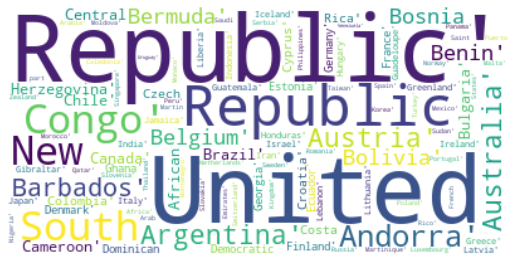

In [3]:
#Question 1a
#Outputs the number of countries observed, and an alphabetized list
countryArr = mpx_data['Country'].unique()
numCountries = len(countryArr)
print(str(numCountries)+str(' countries were observed in this dataset.'))

#Question 1b
#Outputs countries as an alphabetized list
countryList = list(countryArr)
print('In alphabetized order, they are:\n')
number = 0
for country in countryList:
    number+=1
    print(str(number)+'.', country)
    
#Visualization 1
print('\nVisualization 1: \'Countries\' Word Cloud\n')

countryStr = str(countryList)
countryWC = wordcloud.WordCloud(background_color = 'White').generate(countryStr)
countryWC

plt.figure(figsize=(9,9))
plt.imshow(countryWC, interpolation='bilinear')
plt.axis('off')
plt.show()

The top 10 countries by cumulative cases:

 Country
United States     14050
Spain              5792
Brazil             3788
Germany            3266
United Kingdom     3195
France             2873
Canada             1168
Peru               1128
Netherlands        1087
Portugal            770

Visualization 2: 'Top 10 Affected Countries' Bar Chart



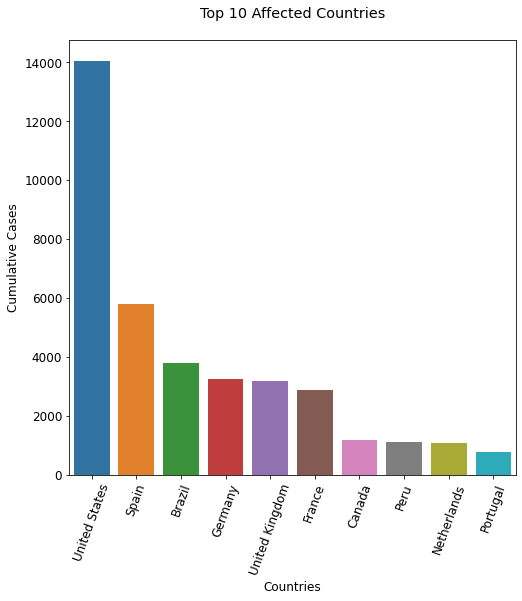

In [4]:
#Question 2
#Outputs the top ten affected countries by cumulative cases this year
casesSum = mpx_data.groupby('Country')['Cases'].sum().sort_values(ascending=False)
topTen = casesSum.head(10)
print(str('The top 10 countries by cumulative cases:\n\n'), topTen.to_string())

print(str('\nVisualization 2: \'Top 10 Affected Countries\' Bar Chart\n'))

plt.rcParams['font.size'] = '12'

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=topTen.index, y=topTen)
ax.set(xlabel = 'Countries', ylabel = 'Cumulative Cases', title='Top 10 Affected Countries\n')
plt.xticks(rotation = 70)
plt.show()

The mean number of cases for all 94 countries observed is:  444.07
The index values for calculating the median are: 47, 48
The median for cumulative cases is 7.5, calculated as the mean of the values from Central African Republic and Panama

Visualization 3: 'Cumulative Cases' Relative Frequency Histogram



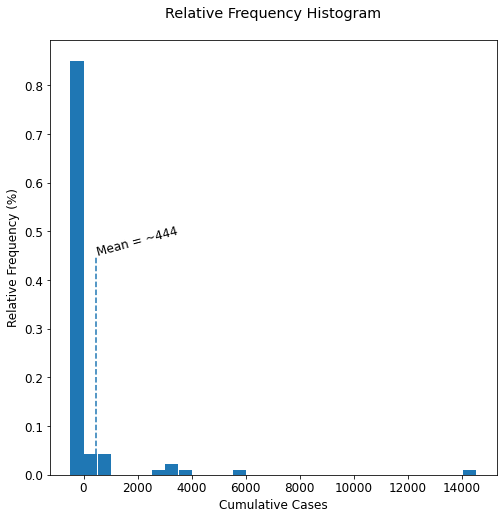

In [5]:
#Question 3a
#Displays the mean number of cumulative cases for all countries observed
cases = mpx_data.groupby('Country')['Cases'].sum()
casesMean = cases.mean()
print('The mean number of cases for all {} countries observed is: '.format(numCountries), round(casesMean, 2))

#Question 3b
#Outputs the median number of cumulative cases for all countries observed
#For an even number of countries, identifies median positions and averages their values
med1 = int((numCountries/2))
med2 = int((numCountries/2)+1)
calcMed = (casesSum[med1]+casesSum[med2])/2

if ((numCountries)%2) == 0:
    print('The index values for calculating the median are: '+str(med1)+', '+str(med2))
    print('The median for cumulative cases is '+str(calcMed)+', calculated as the mean of the values from '+str(casesSum.index[med1])+' and '+str(casesSum.index[med2]))
else:
    print('The index value of the median is: ', (numCountries+1)/2)
    print('The median country is '+str(casesSum.index[med1])+', with '+str(casesSum.iloc[int((numCountries+1)/2)])+' cumulative cases')
    
print(str('\nVisualization 3: \'Cumulative Cases\' Relative Frequency Histogram\n'))

res = stats.relfreq(cases, numbins = 30)
spaces = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size, res.frequency.size)
fig, ax = plt.subplots(figsize=(8,8))
plt.yticks(np.arange(0, 1, 0.1))
ax.bar(spaces, res.frequency, width=res.binsize)
ax.vlines(casesMean, 0.01, 0.45, linestyle='dashed')
ax.annotate('Mean = ~{}'.format(int(casesMean)), (casesMean, 0.45), rotation=15)
ax.set(xlabel='Cumulative Cases', ylabel='Relative Frequency (%)', title='Relative Frequency Histogram\n')
plt.show()

At present, the total number of confirmed cases for all countries worldwide is 41743

Visualization 4: 'Cumulative Cases Year-to-Date' Line Chart



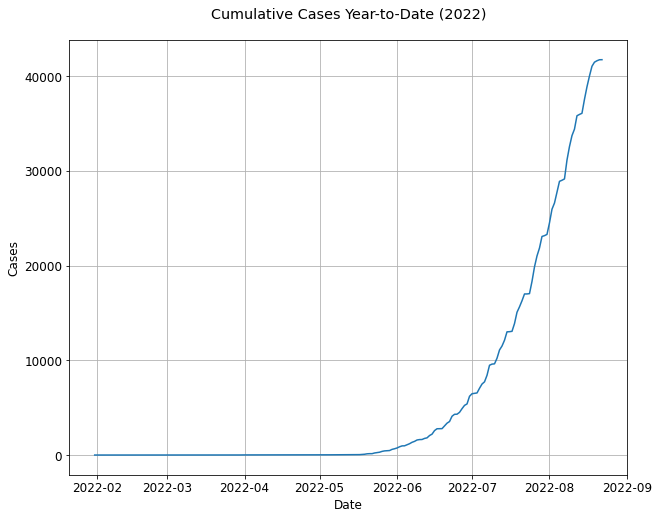

In [6]:
## Question 4
#Outputs cumulative number of confirmed cases globally
print('At present, the total number of confirmed cases for all countries worldwide is '+str(casesSum.sum()))

print(str('\nVisualization 4: \'Cumulative Cases Year-to-Date\' Line Chart\n'))

dailyCumulative = pd.DataFrame(mpx_data.groupby('Date')['Cumulative_cases'].sum())
dfDates = dailyCumulative.index.astype('datetime64[ns]')

fig, ax = plt.subplots(figsize=(10,8))
ax.set(xlabel='Date', ylabel='Cases')
plt.grid(True)
plt.title('Cumulative Cases Year-to-Date (2022)\n')
plt.plot(dfDates, dailyCumulative);

Ten earliest confirmed countries in 2022: 

 Country
Nigeria                             2022-01-31
Cameroon                            2022-02-17
Central African Republic            2022-03-04
Republic of Congo                   2022-04-12
United Kingdom                      2022-05-06
Democratic Republic Of The Congo    2022-05-08
Portugal                            2022-05-17
United States                       2022-05-18
Spain                               2022-05-18
France                              2022-05-19

The first recorded case of 2022 was in Nigeria on 2022-01-31

Visualization 5: 'Earliest Case' Line Chart



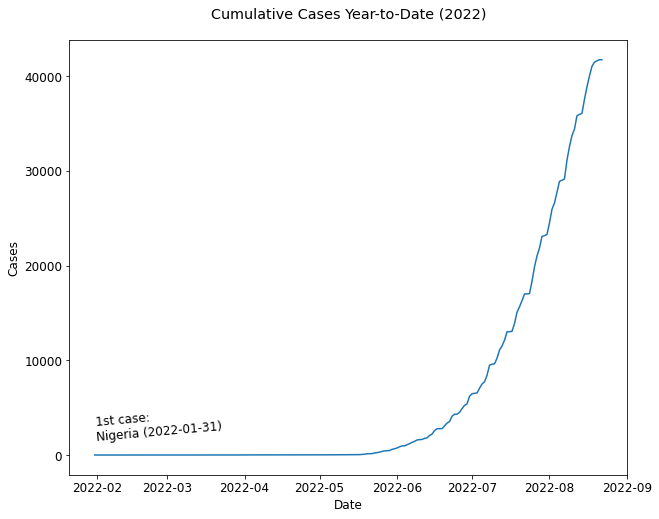

In [7]:
#Question 5a
#Prints countries ordered by earliest recorded case in 2022
earliest = mpx_data.groupby('Country')['Date'].min().sort_values().head(10)
print('Ten earliest confirmed countries in 2022: \n\n', earliest.to_string())

#Question 5b
#Returns earliest confirmed case in 2022, and the country it was recorded in
print('\nThe first recorded case of 2022 was in '+str(earliest.index[0])+str(' on ')+str(earliest[0]))

print(str('\nVisualization 5: \'Earliest Case\' Line Chart\n'))

fig, ax = plt.subplots(figsize=(10,8))
ax.set(ylabel='Cases', title='Cumulative Cases Year-to-Date (2022)\n')
plt.annotate('1st case: \n'+str(earliest.index[0])+' ({})\n'.format(earliest[0]), (dfDates[0], dailyCumulative['Cumulative_cases'][0]), rotation=5)
sns.lineplot(x=dfDates, y=dailyCumulative['Cumulative_cases']);